In [72]:
#Import dependencies
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import csv
import os
import json
from scipy.stats import linregress



In [73]:
#Get tickers for top 10 TECH companies
tickers = yf.Tickers("CVX XOM BP SLB COP OXY PSX MPC HAL")
print(tickers)

yfinance.Tickers object <CVX,XOM,BP,SLB,COP,OXY,PSX,MPC,HAL>


In [74]:
oilandgas_stocks = yf.download("CVX XOM BP SLB COP OXY PSX MPC HAL ",start="2019-12-01", end="2020-03-18")

oilandgas_stocks.index

[*********************100%***********************]  9 of 9 completed


DatetimeIndex(['2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
      

In [75]:
#Get only closing data
oilandgas_stocks_close = oilandgas_stocks["Close"]
oilandgas_stocks_close["Date"] = oilandgas_stocks_close.index

pd.DataFrame(oilandgas_stocks_close).head()

/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BP,COP,CVX,HAL,MPC,OXY,PSX,SLB,XOM,Date
Date,,,,,,,,,,
2019-12-02,37.310001,60.369999,116.800003,21.290001,60.869999,38.680000,114.330002,36.360001,68.419998,2019-12-02
2019-12-03,36.820000,58.889999,115.889999,20.790001,60.029999,38.020000,112.750000,34.990002,67.879997,2019-12-03
2019-12-04,37.060001,60.630001,116.940002,21.469999,60.029999,38.450001,112.570000,36.189999,68.650002,2019-12-04
2019-12-05,36.650002,59.840000,116.330002,21.420000,59.849998,37.980000,112.540001,35.849998,68.410004,2019-12-05
2019-12-06,37.090000,61.970001,118.010002,22.330000,60.200001,39.009998,113.559998,36.889999,69.510002,2019-12-06


In [76]:
oilandgas_stocks_close_plot= oilandgas_stocks_close.drop("Date", axis = 1)


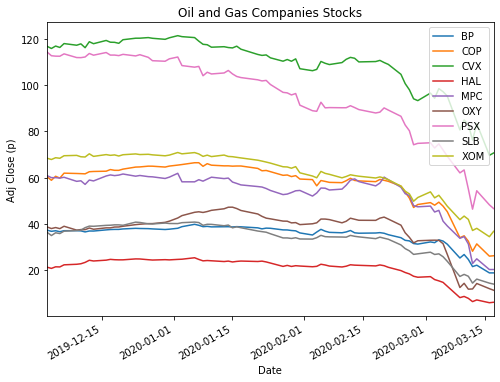

In [77]:
#Plotting the Line chart aesthetics
oilandgas_stocks_close_plot.plot(kind = "line",figsize=(8,6))

plt.xlabel("Date")
plt.ylabel("Adj Close (p)")
plt.legend()
plt.title("Oil and Gas Companies Stocks")
plt.show()



/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


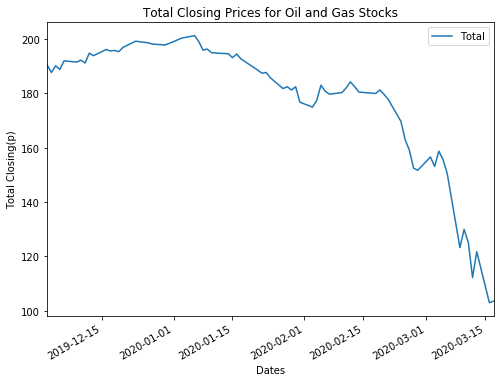

In [78]:
# Adding up the above closing stocks to get the total closing stocks for the day
oilandgas_stocks_close["Total"] = oilandgas_stocks_close["BP"] + oilandgas_stocks_close["CVX"] + oilandgas_stocks_close["SLB"]
+oilandgas_stocks_close["XOM"]+oilandgas_stocks_close["COP"]+oilandgas_stocks_close["OXY"]+oilandgas_stocks_close["PSX"]
+oilandgas_stocks_close["MPC"]+oilandgas_stocks_close["HAL"]

# Making the plot and aesthetics

oilandgas_stocks_close.plot(y = "Total",kind = "line",figsize=(8,6))

plt.xlabel("Dates")
plt.ylabel("Total Closing(p)")
plt.legend()
plt.title("Total Closing Prices for Oil and Gas Stocks")
plt.show()


In [79]:
# Importing COVID-19 cases data to compare with the Oil stocks 

# COVID-19 CSV Reading

covid_cases_file = ("Time-Series/Confirmed.csv")
covid_cases_data = pd.read_csv(covid_cases_file)


covid_deaths_file=("Time-Series/Deaths.csv")
covid_deaths_data = pd.read_csv(covid_deaths_file)

covid_recovered_file=("Time-Series/Recovered.csv")
covid_recovered_data = pd.read_csv(covid_recovered_file)



In [80]:
# cleaning the DF to only the columns we are interested in

reduced_covid_cases= covid_cases_data.drop(columns=["Country/Region","Province/State","Lat","Long"])
reduced_covid_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,2,3,5,7,8,8,14,14,14,19,...,50,50,50,53,59,70,75,82,114,147
1,2,1,2,2,4,4,7,7,11,15,...,461,502,511,581,639,639,701,773,839,825
2,0,1,3,3,4,5,7,7,10,13,...,138,150,150,160,178,178,200,212,226,243
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,93,99,117,129,149,149,197,238,428,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [83]:
# Getting the Total confirmed cases for the each day globally
reduced_covid_cases_sum = pd.DataFrame({"Total":reduced_covid_cases.sum()})

reduced_covid_cases_sum["Date1"]=reduced_covid_cases_sum.index
reduced_covid_cases_sum["Date1"]=pd.to_datetime(reduced_covid_cases_sum["Date1"])
reduced_covid_cases_sum.head()

,Total,Date1
1/22/20,555,2020-01-22
1/23/20,653,2020-01-23
1/24/20,941,2020-01-24
1/25/20,1434,2020-01-25
1/26/20,2118,2020-01-26


In [85]:
# Renaming the Date columns for Oil and gas Stocks data

oilandgas_stocks_close["Date1"] = oilandgas_stocks_close["Date"]

#Merging the Oil and gas closing data  with those of Total COVID-19 Confirmed cases

combined_data = pd.merge(reduced_covid_cases_sum ,oilandgas_stocks_close, how = "inner", on ="Date1")

combined_data.head()


/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total_x,Date1,BP,COP,CVX,HAL,MPC,OXY,PSX,SLB,XOM,Date,Total_y
0,555,2020-01-22,37.880001,63.009998,112.900002,23.93,55.970001,43.290001,101.860001,36.680000,67.190002,2020-01-22,187.460003
1,653,2020-01-23,38.200001,63.139999,113.099998,23.58,55.330002,42.520000,102.080002,36.430000,66.769997,2020-01-23,187.730000
2,941,2020-01-24,38.130001,62.619999,111.849998,23.10,54.490002,42.220001,100.320000,35.770000,66.320000,2020-01-24,185.750000
3,2927,2020-01-27,37.439999,61.040001,110.389999,21.65,52.700001,41.240002,96.919998,33.959999,64.739998,2020-01-27,181.789997
4,5578,2020-01-28,37.410000,61.180000,111.120003,22.08,52.930000,41.200001,96.690002,33.959999,64.650002,2020-01-28,182.490002


In [86]:
# Selecting only the columns we need from above DataFrame

select_combined_data = combined_data.loc[:,["Total_x","Date1","Total_y"]]


#Renaming the selected columns 
                                         
select_combined_data_renamed = combined_data.rename(columns = {"Total_x":"Total_COVID_Cases", "Total_y":"Total_Stock_Price"})

# DataFrame showing only the selected renamed columns
select_combined_data_renamed=select_combined_data.rename(columns = {"Total_x":"Total_COVID_Cases", "Total_y":"Total_Stock_Price"})
select_combined_data_renamed.head()

,Total_COVID_Cases,Date1,Total_Stock_Price
0,555,2020-01-22,187.460003
1,653,2020-01-23,187.730000
2,941,2020-01-24,185.750000
3,2927,2020-01-27,181.789997
4,5578,2020-01-28,182.490002


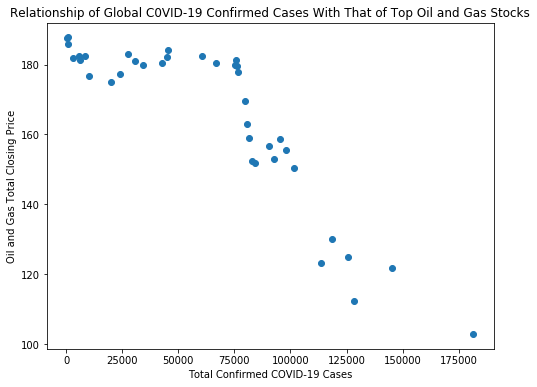

In [95]:
# Generating a scatter plot for the two combined data sets

x = combined_data["Total_x"]
y = combined_data["Total_y"]
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('Total Confirmed COVID-19 Cases')
plt.ylabel('Oil and Gas Total Closing Price')
plt.title('Relationship of Global C0VID-19 Confirmed Cases With That of Top Oil and Gas Stocks')


plt.show()




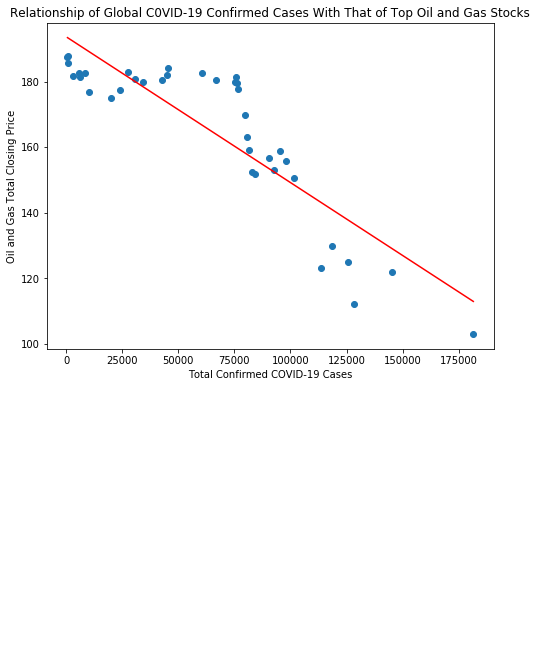

In [97]:
# Generating the line of Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x = combined_data["Total_x"]
y = combined_data["Total_y"]
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('Total Confirmed COVID-19 Cases')
plt.ylabel('Oil and Gas Total Closing Price')
plt.title('Relationship of Global C0VID-19 Confirmed Cases With That of Top Oil and Gas Stocks')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()


In [99]:
# Calculating the correlation coefficient
# calculating and printing the Correlation Relationship between total COVID-19 cases and Tech stocks

correlation = st.pearsonr(x,y)
print(f"The correlation between total global COVID-19 cases and Top Oil and Gas Companies Total closing stocks is {round(correlation[0],2)}")




The correlation between total global COVID-19 cases and Top Oil and Gas Companies Total closing stocks is -0.87
